In [1]:
import os
import pickle
import re
from string import punctuation
from stop_words import get_stop_words
from collections import defaultdict, Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import nltk

from gensim.models import Word2Vec, Doc2Vec, FastText
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import warnings
warnings.filterwarnings('ignore')

/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
display(os.listdir('saved_models/'))

exp_features = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['Název anglicky', 'Anotace anglicky'],
}

['Natural Sciences', 'tf_w2v_d2v_ft,kwords,lemma_stopwords']

In [3]:
query = widgets.Text(
    value='',
    placeholder='Enter a list of keywords separated by a comma',
    disabled=False,
    layout=widgets.Layout(height="auto", width="auto")
)
query

Text(value='', layout=Layout(height='auto', width='auto'), placeholder='Enter a list of keywords separated by …

In [4]:
pd.set_option('display.max_colwidth', None)

exp_name = 'tf_w2v_d2v_ft,kwords,lemma_stopwords'
orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
df = orig_df[exp_features[exp_name]]
df = df[~df.isna().any(axis=1)]
orig_df = orig_df.iloc[df.index]

root_path = os.path.join('saved_models', exp_name)
with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
    vectors = pickle.load(handle)

print('Loaded vectors')    
for model_name, model_vectors in vectors.items():
    print(model_name)
    if not model_name == 'fasttext_100_5':
        continue
    for vec in model_vectors:
        cos_sim = cosine_similarity(vec.reshape(1, -1), model_vectors)[0]
        idxs = cos_sim.argsort()[:-11:-1]
        temp_df = orig_df.iloc[idxs][['Název česky']].copy()
        temp_df['sim'] = cos_sim[idxs]
        temp_df['sim'] = temp_df['sim'].round(5)
        if temp_df['sim'].mean() >= 0.95:
            display(temp_df)

Loaded vectors
tf-idf_(1,5)
word2vec_50_25
fasttext_200_10
doc2vec_50_25


In [6]:
exp_name = 'tf_w2v_d2v_ft,kwords,lemma_stopwords'
root_path = os.path.join('saved_models', exp_name)
with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
    vectors = pickle.load(handle)
    
orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
df = orig_df[exp_features[exp_name]]
df = df[~df.isna().any(axis=1)]
orig_df = orig_df.iloc[df.index]
orig_df = orig_df.reset_index(drop=True)

vecs = vectors['tf-idf_(1,5)']
idx = orig_df[orig_df['Název česky'] == 'Charakterizace genotypů bramboru metodou DNA fingerprintingu'].index
source = vecs[idx]
cos_sim = cosine_similarity(source, vecs)[0]
idxs = cos_sim.argsort()[:-11:-1]

temp_df = orig_df.iloc[idxs][['Klíčová slova', 'Název anglicky']].copy()
temp_df['Míra podobnosti'] = cos_sim[idxs]
temp_df['Míra podobnosti'] = temp_df['Míra podobnosti'].round(4)
temp_df.reset_index(drop=True)

,Klíčová slova,Název anglicky,Míra podobnosti
0,databases of RAPD ethalons,The characterization of potato's genotypes using DNA fingerprinting,1.0000
1,characterization of potatoes,Characterization of the chosen potato varieties and trangenic materials by the molecular genetic techniques,0.5651
2,pšenice; ječmen; brambory; gliadiny; HMW gluteniny; hordeiny; esterázy; hlízové proteiny; elektroforéza; charakterizace a diferenciace odrůd; identifikace odrůd,Development of the methods for objective identification of agricultural crop plants,0.0485
3,brambory; odrůdy; elektroforéza; proteinové a enzymové profily; izolace DNA; RAPD; AFLP; SSR; ITS; databáze,Development and testing of the system of analytical methods for practical characterization of potato cultivars registered in the Czech Republic,0.0436
4,virus-free,Virus-free breeding of potato,0.0430
5,potatoes,Analysis of the Resistance Genes Donors against Potato Cyst Nematodes in Potato Genofond by DNA Markers,0.0417
6,agricultural market,The necessary struktural changes in the Czech potato sector in connection with EU accession.,0.0353
7,Potato research; EAPR,Active participation of the Potato Research Institute Havlíčkův Brod in the international organization European Association for Potato Research,0.0321
8,NaN,Identification (DNA fingerprinting) of Barley Varieties and In-Process Breeding Material for the Application in Breeding and Malting Industry.,0.0317
9,NaN,Developmant of horizontal resistance against Late blight suplemented for resistance against potato virus diseases.,0.0314


In [159]:
from collections import defaultdict
pd.set_option('display.max_colwidth', None)

exp_features = {
    'd2v_w2v_kwords_nolemma': ['Kód projektu', 'Klíčová slova'],
    'ud_pipe_nazev_anotace_stopwords': ['Kód projektu', 'Název česky', 'Anotace česky'],
    'tf_w2v_d2v_fast_eng_n_a_kwords_2': ['Kód projektu', 'Název anglicky', 'Anotace anglicky', 'Klíčová slova'],
    'tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2': ['Kód projektu', 'Název česky', 'Anotace česky', 'Hlavní CEP obor', 'Podrobné informace o účastnících', 'Hlavní řešitelé', 'Poskytovatel']
}

exp_names = {
    'd2v_w2v_kwords_nolemma': 'Skupina 2',
    'ud_pipe_nazev_anotace_stopwords': 'Skupina 4',
    'tf_w2v_d2v_fast_eng_n_a_kwords_2': 'Skupina 5',
    'tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2': 'Skupina 6'
}

exp_models = {
    'd2v_w2v_kwords_nolemma': ['tf-idf_(5,5)', 'word2vec_200', 'doc2vec_100_100', 'word2vec_(fasttext-wiki-news-subwords-300)', 'word2vec_(glove-twitter-25)'],
    'ud_pipe_nazev_anotace_stopwords': ['tf-idf_(1,3)', 'word2vec_100_50', 'doc2vec_25_50', 'fasttext_100_5'],
    'tf_w2v_d2v_fast_eng_n_a_kwords_2': ['tf-idf_(1,3)', 'word2vec_25_10', 'doc2vec_200_50', 'fasttext_100_25'],
    'tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2': ['tf-idf_(4,4)', 'word2vec_100_10', 'doc2vec_200_10', 'fasttext_100_50']

}

orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
cols = ['Kód projektu',
        'Název anglicky', 
        'Anotace anglicky', 
        'Klíčová slova',
        'Název česky', 
        'Anotace česky', 
        'Hlavní CEP obor', 
        'Podrobné informace o účastnících', 
        'Hlavní řešitelé', 
        'Poskytovatel']
df = orig_df[cols]
df = df[~df.isna().any(axis=1)]
results = defaultdict(list)
pdf = df.sample(n=5, random_state=42)
for exp_name, columns in exp_features.items():
    odf = orig_df[exp_features[exp_name]].copy()
    odf = odf[~odf.isna().any(axis=1)]
    odf = orig_df.iloc[odf.index].copy()
    odf = odf.reset_index(drop=True)

    root_path = os.path.join('saved_models', exp_name)
    with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
        vectors = pickle.load(handle)

    for _, project in pdf.iterrows():
        idx = odf[odf['Kód projektu'] == project['Kód projektu']].index
        for model_name in exp_models[exp_name]:
            print(exp_names[exp_name], project['Kód projektu'], model_name)
            vecs = vectors[model_name]
            source = vecs[idx]
            cos_sim = cosine_similarity(source, vecs)[0]
            idxs = cos_sim.argsort()[:-7:-1]

            if 'Klíčová slova' in columns:
                temp_df = odf.iloc[idxs][['Kód projektu', 'Klíčová slova', 'Název česky']].copy()
            else:
                temp_df = odf.iloc[idxs][['Kód projektu', 'Název česky']].copy()

            temp_df['Míra podobnosti'] = cos_sim[idxs]
            temp_df['Míra podobnosti'] = temp_df['Míra podobnosti'].round(4)
            temp_df = temp_df.reset_index(drop=True)
            for id_, (_, row) in enumerate(temp_df.iterrows()):
                results['Experiment'].append(exp_names[exp_name])
                results['Model'].append(model_name)
                results['Kód vstupního projektu'].append(project['Kód projektu'])
                results['Pořadí'].append(id_)
                results['Klíčová slova'].append(orig_df[orig_df['Kód projektu'] == row['Kód projektu']]['Klíčová slova'].item())
                results['Název česky'].append(row['Název česky'])
                results['Míra podobnosti'].append(row['Míra podobnosti'])
                    
                # display(temp_df)
results_df = pd.DataFrame(results)

Skupina 2 GA13-20613S tf-idf_(5,5)
Skupina 2 GA13-20613S word2vec_200
Skupina 2 GA13-20613S doc2vec_100_100
Skupina 2 GA13-20613S word2vec_(fasttext-wiki-news-subwords-300)
Skupina 2 GA13-20613S word2vec_(glove-twitter-25)
Skupina 2 IAA3013006 tf-idf_(5,5)
Skupina 2 IAA3013006 word2vec_200
Skupina 2 IAA3013006 doc2vec_100_100
Skupina 2 IAA3013006 word2vec_(fasttext-wiki-news-subwords-300)
Skupina 2 IAA3013006 word2vec_(glove-twitter-25)
Skupina 2 LM2015084 tf-idf_(5,5)
Skupina 2 LM2015084 word2vec_200
Skupina 2 LM2015084 doc2vec_100_100
Skupina 2 LM2015084 word2vec_(fasttext-wiki-news-subwords-300)
Skupina 2 LM2015084 word2vec_(glove-twitter-25)
Skupina 2 QJ1630210 tf-idf_(5,5)
Skupina 2 QJ1630210 word2vec_200
Skupina 2 QJ1630210 doc2vec_100_100
Skupina 2 QJ1630210 word2vec_(fasttext-wiki-news-subwords-300)
Skupina 2 QJ1630210 word2vec_(glove-twitter-25)
Skupina 2 GA14-02290S tf-idf_(5,5)
Skupina 2 GA14-02290S word2vec_200
Skupina 2 GA14-02290S doc2vec_100_100
Skupina 2 GA14-02290S wor

In [172]:
with open('similiatiry_results_jazykoveda.html', 'w') as fo:
    results_df.set_index(['Experiment', 'Obor', 'Model', 'Kód vstupního projektu', 'Pořadí']).sort_index().to_html(fo)
results_df.set_index(['Experiment', 'Obor', 'Model', 'Kód vstupního projektu', 'Pořadí']).sort_index().to_csv('similiarity_results_jazykoveda.csv', sep='@')

In [171]:
from collections import defaultdict
pd.set_option('display.max_colwidth', None)

exp_features = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['Název anglicky', 'Anotace anglicky'],
}

oecd_mapping = {
    'Natural Sciences': ['BA', 'BD', 'BB', 'IN', 'BC', 'BD', 'AF', 'BE', 'BM', 'BF', 'BG', 'BK', 'BL', 'BH', 'BI', 'BN', 'CC', 'CA', 'CH', 'CF', 'CD', 'CG', 'CB', 'DA', 'DB', 'DC', 'DE', 'DG', 'DO', 'DK', 'DL', 'DM', 'DI', 'DJ', 'EA', 'EB', 'EE', 'CE', 'BO', 'EF', 'EG', 'EH'],
    'Engineering and Technology': ['JN', 'JM', 'GB', 'AL', 'JO', 'JA', 'JB', 'JW', 'JD', 'JC', 'JR', 'JT', 'JQ', 'BJ', 'JU', 'JV', 'JF', 'JS', 'JL', 'CI', 'JP', 'JG', 'JJ', 'JH', 'JI', 'JK', 'FS', 'DH', 'JE', 'JT', 'JP', 'JQ', 'EI', 'GM', 'JY', 'KA'],
    'Medical and Health Sciences': ['EB', 'EC', 'FH', 'FR', 'ED', 'FP', 'FA', 'FB', 'FC', 'FD', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FO', 'FE', 'FP', 'FL', 'FN', 'FM', 'DN', 'AQ', 'AK', 'FP', 'EI'],
    'Agricultural and veterinary sciences': ['GD', 'GK', 'GL', 'DF', 'GE', 'GC', 'GE', 'GG', 'GH', 'GI', 'GJ', 'EI'],
    'Social Sciences': ['AN', 'AH', 'GA', 'AM', 'AO', 'AC', 'AG', 'AD', 'AE', 'DE', 'AP', 'AO', 'AJ', 'AF', 'AK'],
    'Humanities and the Arts': ['AB', 'AC', 'AI', 'AJ', 'AA', 'AL'],
}

exp_models = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['tf-idf_(1,5)', 'word2vec_50_25', 'doc2vec_50_25', 'fasttext_200_10'],

}

orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
cols = ['Kód projektu',
        'Název anglicky', 
        'Anotace anglicky', 
        'Klíčová slova',
        'Název česky', 
        'Anotace česky', 
        'Hlavní CEP obor', 
        'Podrobné informace o účastnících', 
        'Hlavní řešitelé', 
        'Poskytovatel']
df = orig_df[cols]
df = df[~df.isna().any(axis=1)]
results = defaultdict(list)
for field_name, obory in oecd_mapping.items():
    pdf = df[df['Hlavní CEP obor'].isin(obory)]
    for exp_name, columns in exp_features.items():
        odf = orig_df[exp_features[exp_name]].copy()
        odf = odf[~odf.isna().any(axis=1)]
        odf = orig_df.iloc[odf.index].copy()
        odf = odf.reset_index(drop=True)
        
        root_path = os.path.join('saved_models', exp_name)
        with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
            vectors = pickle.load(handle)
        
        for _, project in pdf.iterrows():
            idx = odf[odf['Kód projektu'] == project['Kód projektu']].index
            for model_name in exp_models[exp_name]:
                vecs = vectors[model_name]
                source = vecs[idx]
                cos_sim = cosine_similarity(source, vecs)[0]
                idxs = cos_sim.argsort()[:-7:-1]
                
                if 'Klíčová slova' in columns:
                    temp_df = odf.iloc[idxs][['Kód projektu', 'Klíčová slova', 'Název česky']].copy()
                else:
                    temp_df = odf.iloc[idxs][['Kód projektu', 'Název anglicky']].copy()
                
                temp_df['Míra podobnosti'] = cos_sim[idxs]
                temp_df['Míra podobnosti'] = temp_df['Míra podobnosti'].round(4)
                temp_df = temp_df.reset_index(drop=True)
                for id_, (_, row) in enumerate(temp_df.iterrows()):
                    results['Model'].append(model_name)
                    results['Obor'].append(field)
                    results['Kód vstupního projektu'].append(project['Kód projektu'])
                    results['Pořadí'].append(id_)
                    results['Klíčová slova'].append(orig_df[orig_df['Kód projektu'] == row['Kód projektu']]['Klíčová slova'].item())
                    results['Název anglicky'].append(row['Název anglicky'])
                    results['Míra podobnosti'].append(row['Míra podobnosti'])
                    
                # display(temp_df)
results_df = pd.DataFrame(results)        

AI - Jazykověda Skupina 2 GA16-06012S tf-idf_(5,5)
AI - Jazykověda Skupina 2 GA16-06012S word2vec_200
AI - Jazykověda Skupina 2 GA16-06012S doc2vec_100_100
AI - Jazykověda Skupina 2 GA16-06012S word2vec_(fasttext-wiki-news-subwords-300)
AI - Jazykověda Skupina 2 GA16-06012S word2vec_(glove-twitter-25)
AI - Jazykověda Skupina 2 GA17-13671S tf-idf_(5,5)
AI - Jazykověda Skupina 2 GA17-13671S word2vec_200
AI - Jazykověda Skupina 2 GA17-13671S doc2vec_100_100
AI - Jazykověda Skupina 2 GA17-13671S word2vec_(fasttext-wiki-news-subwords-300)
AI - Jazykověda Skupina 2 GA17-13671S word2vec_(glove-twitter-25)
AI - Jazykověda Skupina 2 GA14-10673S tf-idf_(5,5)
AI - Jazykověda Skupina 2 GA14-10673S word2vec_200
AI - Jazykověda Skupina 2 GA14-10673S doc2vec_100_100
AI - Jazykověda Skupina 2 GA14-10673S word2vec_(fasttext-wiki-news-subwords-300)
AI - Jazykověda Skupina 2 GA14-10673S word2vec_(glove-twitter-25)
AI - Jazykověda Skupina 2 GA15-13277S tf-idf_(5,5)
AI - Jazykověda Skupina 2 GA15-13277S wo

In [55]:
pd.pivot_table(data=results_df, values=['Klíčová slova', 'Název česky', 'Míra podobnosti'], index=['Experiment', 'Obor', 'Model', 'Kód vstupního projektu'], )

Míra podobnosti
Experiment Model           Obor                                    Kód vstupního projektu                 
Skupina 2  doc2vec_100_100 BM - Fyzika pevných látek a magnetismus EF15_003/0000487                 5.3375
                                                                   GA13-13671S                      5.6979
                                                                   IAA2010926                       4.9212
                                                                   LM2011026                        6.8895
                                                                   ME 512                           5.2891
...                                                                                                    ...
Skupina 6  word2vec_100_10 JN - Stavebnictví                       EF16_017/0002681                 9.7087
                                                                   GA14-22978S                      9.7496
                                                                   GA14-25504S                      9.6833
                                                                   GA16-11879S                      9.7437
                                                                   TA02030612                       9.7591

[425 rows x 1 columns]

In [156]:
with open('similiatiry_results.html', 'w') as fo:
    results_df.set_index(['Experiment', 'Model', 'Obor', 'Kód vstupního projektu', 'Pořadí']).sort_index().to_html(fo)

In [13]:
sns.load_dataset('tips')


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


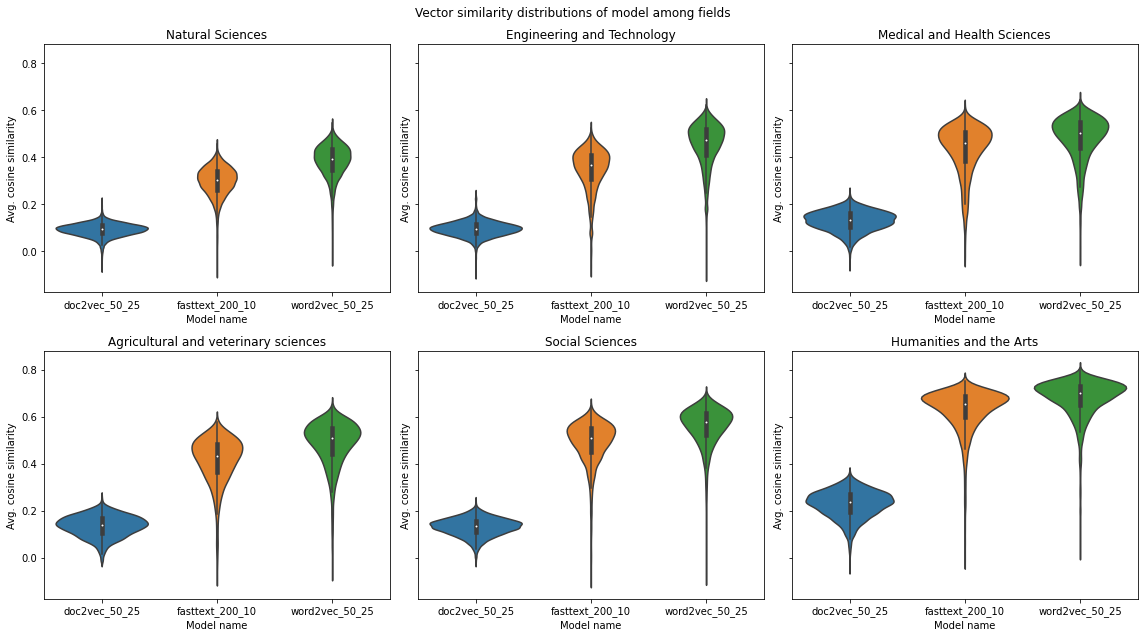

In [9]:
from collections import defaultdict
pd.set_option('display.max_colwidth', None)

exp_features = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['Název anglicky', 'Anotace anglicky'],
}

oecd_mapping = {
    'Natural Sciences': ['BA', 'BD', 'BB', 'IN', 'BC', 'BD', 'AF', 'BE', 'BM', 'BF', 'BG', 'BK', 'BL', 'BH', 'BI', 'BN', 'CC', 'CA', 'CH', 'CF', 'CD', 'CG', 'CB', 'DA', 'DB', 'DC', 'DE', 'DG', 'DO', 'DK', 'DL', 'DM', 'DI', 'DJ', 'EA', 'EB', 'EE', 'CE', 'BO', 'EF', 'EG', 'EH'],
    'Engineering and Technology': ['JN', 'JM', 'GB', 'AL', 'JO', 'JA', 'JB', 'JW', 'JD', 'JC', 'JR', 'JT', 'JQ', 'BJ', 'JU', 'JV', 'JF', 'JS', 'JL', 'CI', 'JP', 'JG', 'JJ', 'JH', 'JI', 'JK', 'FS', 'DH', 'JE', 'JT', 'JP', 'JQ', 'EI', 'GM', 'JY', 'KA'],
    'Medical and Health Sciences': ['EB', 'EC', 'FH', 'FR', 'ED', 'FP', 'FA', 'FB', 'FC', 'FD', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FO', 'FE', 'FP', 'FL', 'FN', 'FM', 'DN', 'AQ', 'AK', 'FP', 'EI'],
    'Agricultural and veterinary sciences': ['GD', 'GK', 'GL', 'DF', 'GE', 'GC', 'GE', 'GG', 'GH', 'GI', 'GJ', 'EI'],
    'Social Sciences': ['AN', 'AH', 'GA', 'AM', 'AO', 'AC', 'AG', 'AD', 'AE', 'DE', 'AP', 'AO', 'AJ', 'AF', 'AK'],
    'Humanities and the Arts': ['AB', 'AC', 'AI', 'AJ', 'AA', 'AL'],
}

exp_models = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['doc2vec_50_25', 'fasttext_200_10', 'word2vec_50_25'],

}

orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
cols = ['Kód projektu',
        'Název anglicky', 
        'Anotace anglicky',
        'Hlavní CEP obor']
df = orig_df[cols]
df = df[~df.isna().any(axis=1)]
results = defaultdict(list)
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
for i, (field_name, obory) in enumerate(oecd_mapping.items()):
    obor = [o for o in df['Hlavní CEP obor'].astype(str).unique() if any(o.startswith(x) for x in obory)]
    pdf = df[df['Hlavní CEP obor'].isin(obor)]
    for exp_name, columns in exp_features.items():
        odf = orig_df[exp_features[exp_name]].copy()
        odf = odf[~odf.isna().any(axis=1)]
        odf = orig_df.iloc[odf.index].copy()
        odf = odf.reset_index(drop=True)

        root_path = os.path.join('saved_models', exp_name)
        with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
            vectors = pickle.load(handle)

        dct = {}
        for model_name in exp_models[exp_name]:
            sim_matrix = cosine_similarity(vectors[model_name])

            idx = odf[odf['Kód projektu'].isin(pdf['Kód projektu'].unique())].index
            field_sim = sim_matrix[np.ix_(idx, idx)]
            dct[model_name] = np.mean(field_sim, axis=0)
            del sim_matrix
            del field_sim

        sim_df = pd.melt(pd.DataFrame.from_dict(dct), var_name='Model name', value_name='Avg. cosine similarity')
        sns.violinplot(data=sim_df, x='Model name', y='Avg. cosine similarity', ax=axes[i//3][i%3])
        axes[i//3][i%3].set_title(field_name)
plt.suptitle(f'Vector similarity distributions of model among fields')
plt.tight_layout()
plt.show()

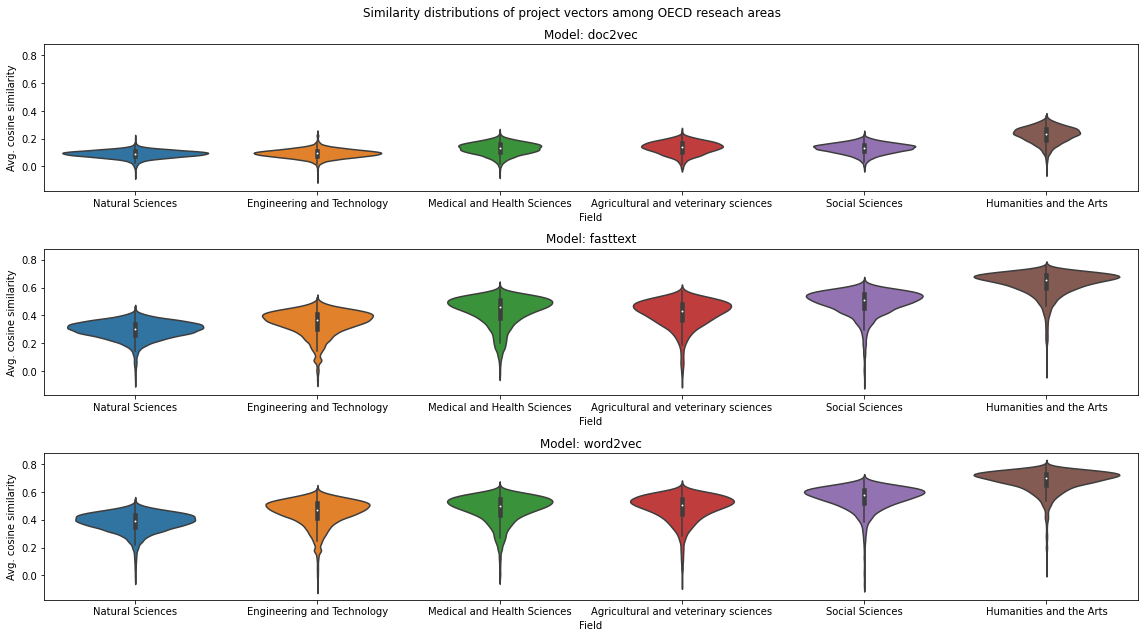

In [19]:
from collections import defaultdict
pd.set_option('display.max_colwidth', None)

exp_features = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['Název anglicky', 'Anotace anglicky'],
}

oecd_mapping = {
    'Natural Sciences': ['BA', 'BD', 'BB', 'IN', 'BC', 'BD', 'AF', 'BE', 'BM', 'BF', 'BG', 'BK', 'BL', 'BH', 'BI', 'BN', 'CC', 'CA', 'CH', 'CF', 'CD', 'CG', 'CB', 'DA', 'DB', 'DC', 'DE', 'DG', 'DO', 'DK', 'DL', 'DM', 'DI', 'DJ', 'EA', 'EB', 'EE', 'CE', 'BO', 'EF', 'EG', 'EH'],
    'Engineering and Technology': ['JN', 'JM', 'GB', 'AL', 'JO', 'JA', 'JB', 'JW', 'JD', 'JC', 'JR', 'JT', 'JQ', 'BJ', 'JU', 'JV', 'JF', 'JS', 'JL', 'CI', 'JP', 'JG', 'JJ', 'JH', 'JI', 'JK', 'FS', 'DH', 'JE', 'JT', 'JP', 'JQ', 'EI', 'GM', 'JY', 'KA'],
    'Medical and Health Sciences': ['EB', 'EC', 'FH', 'FR', 'ED', 'FP', 'FA', 'FB', 'FC', 'FD', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FO', 'FE', 'FP', 'FL', 'FN', 'FM', 'DN', 'AQ', 'AK', 'FP', 'EI'],
    'Agricultural and veterinary sciences': ['GD', 'GK', 'GL', 'DF', 'GE', 'GC', 'GE', 'GG', 'GH', 'GI', 'GJ', 'EI'],
    'Social Sciences': ['AN', 'AH', 'GA', 'AM', 'AO', 'AC', 'AG', 'AD', 'AE', 'DE', 'AP', 'AO', 'AJ', 'AF', 'AK'],
    'Humanities and the Arts': ['AB', 'AC', 'AI', 'AJ', 'AA', 'AL'],
}

exp_models = {
    'tf_w2v_d2v_ft,kwords,lemma_stopwords': ['doc2vec_50_25', 'fasttext_200_10', 'word2vec_50_25'],

}

orig_df = pd.read_csv('../data/TACR_Starfos_isvav_project.csv')
cols = ['Kód projektu',
        'Název anglicky', 
        'Anotace anglicky',
        'Hlavní CEP obor']
df = orig_df[cols]
df = df[~df.isna().any(axis=1)]
results = defaultdict(list)
fig, axes = plt.subplots(3, 1, figsize=(16, 9), sharey=True)
for exp_name, columns in exp_features.items():
    odf = orig_df[exp_features[exp_name]].copy()
    odf = odf[~odf.isna().any(axis=1)]
    odf = orig_df.iloc[odf.index].copy()
    odf = odf.reset_index(drop=True)

    root_path = os.path.join('saved_models', exp_name)
    with open(os.path.join(root_path, 'vectors.pickle'), 'rb') as handle:
        vectors = pickle.load(handle)
    
    dct = {}
    for i, model_name in enumerate(exp_models[exp_name]):
        sim_matrix = cosine_similarity(vectors[model_name])

        max_len = 0
        for field_name, obory in oecd_mapping.items():
            obor = [o for o in df['Hlavní CEP obor'].astype(str).unique() if any(o.startswith(x) for x in obory)]
            pdf = df[df['Hlavní CEP obor'].isin(obor)]
            max_len = max(max_len, len(pdf))
        for field_name, obory in oecd_mapping.items():
            obor = [o for o in df['Hlavní CEP obor'].astype(str).unique() if any(o.startswith(x) for x in obory)]
            pdf = df[df['Hlavní CEP obor'].isin(obor)]
            idx = odf[odf['Kód projektu'].isin(pdf['Kód projektu'].unique())].index

            field_sim = sim_matrix[np.ix_(idx, idx)]
            mean_sim = np.mean(field_sim, axis=0)
            del field_sim
            mean_sim = np.pad(mean_sim, pad_width=(0, max_len-len(mean_sim)), mode='constant', constant_values=np.nan)
            dct[field_name] = mean_sim
        del sim_matrix
        sim_df = pd.melt(pd.DataFrame.from_dict(dct), var_name='Field', value_name='Avg. cosine similarity')
        sns.violinplot(data=sim_df, x='Field', y='Avg. cosine similarity', ax=axes[i])
        axes[i].set_title(f'Model: {model_name.split("_")[0]}')
plt.suptitle(f'Similarity distributions of project vectors among OECD reseach areas')
plt.tight_layout()
plt.show()

In [158]:
results_df.set_index(['Experiment', 'Model', 'Obor', 'Kód vstupního projektu', 'Pořadí']).sort_index().to_csv('similiarity_results.csv', sep='@')

In [165]:
orig_df['Hlavní CEP obor'].unique()

array(['FB - Endokrinologie, diabetologie, metabolismus, výživa',
       'EB - Genetika a molekulární biologie',
       'FR - Farmakologie a lékárnická chemie', 'FO - Dermatovenerologie',
       'FH - Neurologie, neurochirurgie, neurovědy', 'FM - Hygiena',
       'FN - Epidemiologie, infekční nemoci a klinická imunologie',
       'FA - Kardiovaskulární nemoci včetně kardiochirurgie',
       'FL - Psychiatrie, sexuologie',
       'FE - Ostatní obory vnitřního lékařství',
       'FK - Gynekologie a porodnictví', 'FI - Traumatologie a ortopedie',
       'FP - Ostatní lékařské obory',
       'FF - ORL, oftalmologie, stomatologie',
       'FJ - Chirurgie včetně transplantologie', 'FC - Pneumologie',
       'FD - Onkologie a hematologie',
       'GF - Choroby, škůdci, plevely a ochrana rostlin',
       'GH - Výživa hospodářských zvířat',
       'GJ - Choroby a škůdci zvířat, veterinární medicina',
       'EE - Mikrobiologie, virologie', 'EC - Imunologie',
       'EI - Biotechnologie a bionik